In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from aux_feature_importances import getLabels

In [2]:
df = pd.read_csv('../inputs/transneo_analysis_dataframe_extralimited_nochemo1.csv')

output_folder = 'graphs-files'

In [3]:
# Get list of relevant features
fam = pickle.load(open('../inputs/transneo_analysis_featnames_extralimited_nochemo1.p', 'rb'))
list1 = fam['clin']+fam['dna']+fam['rna']+fam['digpath']+fam['chemo']
unique_feats = np.unique(list1)

In [4]:
# Get nice names
df_labels_agnost = getLabels()
label_dic = {}
for ind in df_labels_agnost.index:
    long = df_labels_agnost.loc[ind, 'Classification']
    nice = df_labels_agnost.loc[ind, 'Label']
    label_dic[long] = nice

In [5]:
# Calculate correlation matrix
corr = df[unique_feats].corr(method='spearman')
nice_labels = [label_dic[x] for x in corr.columns.values]

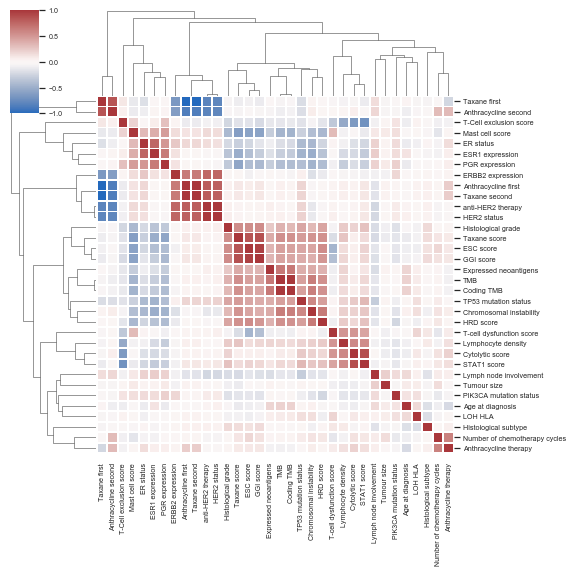

In [6]:
# Draw the full plot
sns.set(font_scale=0.65)
sns.clustermap(corr, center=0, cmap="vlag",
               linewidths=.75, figsize=(8, 8),
               xticklabels=nice_labels, yticklabels=nice_labels)
plt.savefig(output_folder+'/correlation_plot.pdf', bbox_inches='tight', transparent=True)
plt.show()